# Object Detection 

Object detection is a CV technique to identify and localize objects either on static images or in real time setting. `YOLO`(You Only Look Once) is one of models that can perform well on object detection tasks. It is a real-time detection algorithm.

In `ml5_ipynb`, `ObjectDetector` uses `YOLO`(version 1) by default. In this notebook, we will perform obejct detection on several images.

In [1]:
from ml5_ipynb import ml5_detector

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Single Object Detection

The following image is a bird image. 
<img src = "pic/bird1.jpg" width=20%>
</img>

The `draw_bounding_box` function can display the image with a box rounding the object detected. It is indicated that YOLO can localize the bird pretty well.

In [18]:
img_path = 'pic/bird1.jpg'
img = cv2.imread(img_path)
img_rgba = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
width = 640
height = 420
resize_size = (width, height)
img_rgba = cv2.resize(img_rgba, resize_size)
x, y, channel = img_rgba.shape

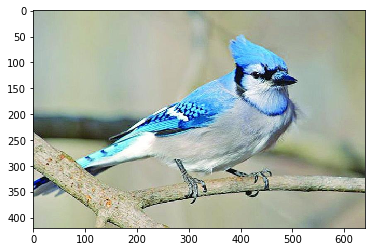

In [19]:
plt.imshow(img_rgba)

In [5]:
model1 = ml5_detector.ObjectDetector('yolo')

...............Model is ready


In [6]:
model1.image_detect(img_rgba,width=width,height=height)

.........done


bird 11 0 608 419


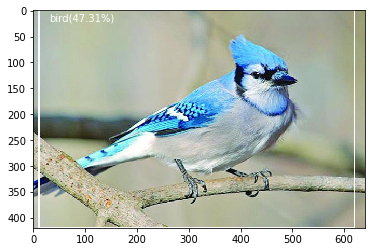

In [8]:
model1.draw_bounding_box(img_rgba)

# Multiple-Object Detection

YOLO can also detect multiple objects (even though not as good as cocossd).

### Example 1

The following image contains four people.

In [9]:
img_path = 'pic/faces.jpg'
img = cv2.imread(img_path)
img_rgba = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
width = 800
height = 600
resize_size = (width, height)
img_rgba = cv2.resize(img_rgba, resize_size)
x, y, channel = img_rgba.shape

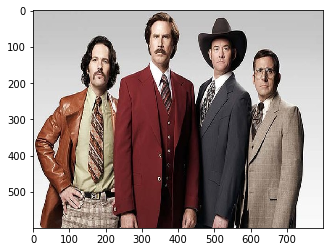

In [10]:
plt.imshow(img_rgba)

In [11]:
model_multi = ml5_detector.ObjectDetector('yolo')

........Model is ready


In [12]:
model_multi.image_detect(img_rgba,width=width,height=height)

.............done


tie 345 164 24 94
person 435 23 169 569
person 582 154 155 390
tie 617 256 19 73


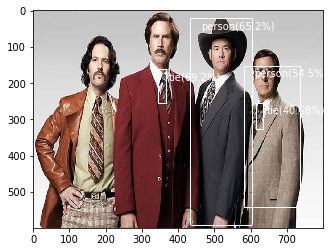

In [13]:
model_multi.draw_bounding_box(img_rgba)

There are four objects detected, two ties and two people. 

### Example 2

The following image is a "crowded" image. 

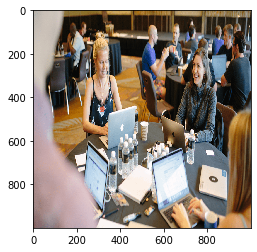

In [14]:
img_path = 'pic/meeting.png'
img = cv2.imread(img_path)
img_rgba = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
width = 1000
height = 1000
resize_size = (width, height)
img_rgba = cv2.resize(img_rgba, resize_size)
x, y, channel = img_rgba.shape
plt.imshow(img_rgba)

In [15]:
model_multi2 = ml5_detector.ObjectDetector('yolo')

........Model is ready


In [16]:
model_multi2.detect_result = []
model_multi2.image_detect('pic/meeting.png',width=width,height=height)

.....done


bottle 701 531 35 108
wine glass 368 447 112 242


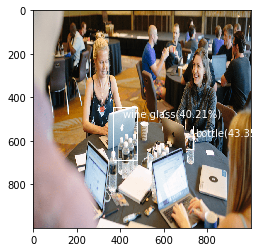

In [17]:
model_multi2.draw_bounding_box(img_rgba)

There are only two objects detected.